In [1]:
import pandas
pandas.__version__

'0.23.4'

In [2]:
import matplotlib.pyplot as plt

In [3]:
# For some reason, if this is in the same call as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [16.0,6.0]

In [4]:
import glob

#for filepath in glob.glob('~/20181010-1000genomes-unmapped-hhv6/NA211**.HHV6b.depth.csv'):
# python doesn't like the ~ (tilda) apparently

for filepath in glob.iglob('/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA211??.HHV6b.depth.csv'):
    print(filepath)


/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21127.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21144.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21103.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21128.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21115.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21112.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21104.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21143.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21120.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21113.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21137.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21142.HHV6b.depth.csv
/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/NA21105.HHV6b.depth.csv
/Users/jakew

In [5]:
import glob

#for filepath in glob.glob('~/20181010-1000genomes-unmapped-hhv6/NA211**.HHV6b.depth.csv'):
# python doesn't like the ~ (tilda) apparently

merged=pandas.DataFrame(columns=["position","depth"])
merged.set_index("position",inplace=True)
for filepath in glob.iglob('/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/*.HHV6a.depth.csv'):
    d = pandas.read_csv(filepath,
                    sep="\t",
                    header=None,
                    usecols=[1,2],
                    names=["position","depth"],
                    index_col="position")
    merged=merged.add(d, fill_value=0)


In [6]:
merged.head()

,depth
position,
1,1
2,1
3,1
4,1
5,1


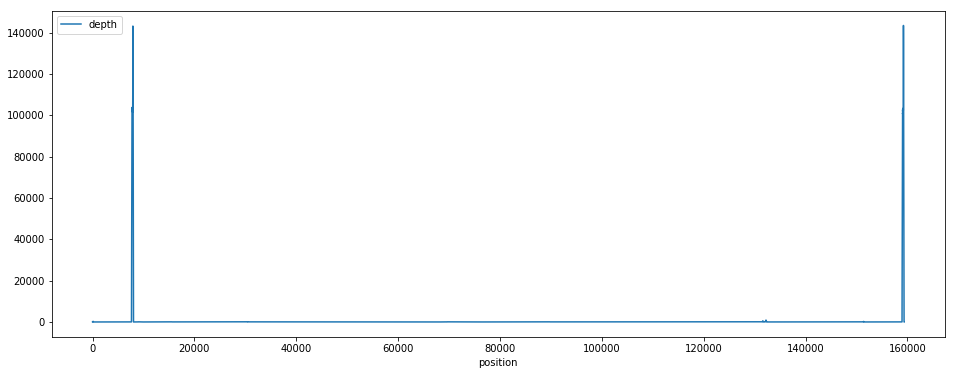

In [7]:
merged.plot()

In [8]:
import glob

#for filepath in glob.glob('~/20181010-1000genomes-unmapped-hhv6/NA211**.HHV6b.depth.csv'):
# python doesn't like the ~ (tilda) apparently

merged=pandas.DataFrame(columns=["position","depth"])
merged.set_index("position",inplace=True)
for filepath in glob.iglob('/Users/jakewendt/20181010-1000genomes-unmapped-hhv6/*.HHV6b.depth.csv'):
    d = pandas.read_csv(filepath,
                    sep="\t",
                    header=None,
                    usecols=[1,2],
                    names=["position","depth"],
                    index_col="position")
    merged=merged.add(d, fill_value=0)

In [9]:
merged.head()

,depth
position,
26,2
27,2
28,2
29,2
30,2


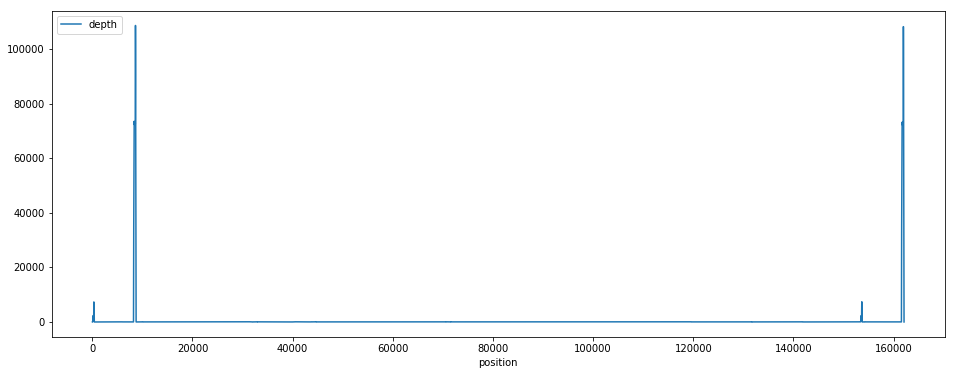

In [10]:
merged.plot()